# 9 Pandas分组与聚合

# 设置索引

In [1]:
import pandas as pd
import numpy as np

In [2]:
#索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7),'b': range(7, 0, -1),
                  'c': ['one','one','one','two','two','two', 'two'],
                  'd': list("hjklmno")})
a

,a,b,c,d
0,0,7,one,h
1,1,6,one,j
2,2,5,one,k
3,3,4,two,l
4,4,3,two,m
5,5,2,two,n
6,6,1,two,o


In [8]:
c=a.copy()
a.index=list('abcdefg')  #a的索引变了，a.index更换索引
print(c)
# a.columns=list('ABCD')  #a的列名变了，a.columns更换列名
print('-'*50)
print(a)

     a  b  d
c           
one  0  7  h
one  1  6  j
one  2  5  k
two  3  4  l
two  4  3  m
two  5  2  n
two  6  1  o
--------------------------------------------------
   a  b  d
a  0  7  h
b  1  6  j
c  2  5  k
d  3  4  l
e  4  3  m
f  5  2  n
g  6  1  o


In [9]:
c.values.shape

(7, 3)

In [10]:
#让某些列变为索引，让c列，d列数据变为索引,变成索引的列就不再是数据列了
print(a)
print('-'*50)
a.set_index(['d'],inplace=True)#a没变，返回修改后的df
print(a)

   a  b  d
a  0  7  h
b  1  6  j
c  2  5  k
d  3  4  l
e  4  3  m
f  5  2  n
g  6  1  o
--------------------------------------------------
   a  b
d      
h  0  7
j  1  6
k  2  5
l  3  4
m  4  3
n  5  2
o  6  1


In [11]:
a.columns

Index(['a', 'b'], dtype='str')

In [13]:
a.index

Index(['h', 'j', 'k', 'l', 'm', 'n', 'o'], dtype='str', name='d')

### 时间序列

In [16]:
pd.date_range(start="20190101", end="20190201")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[us]', freq='D')

In [17]:
pd.date_range(start="20250107",periods=10,freq='B')#B表示工作日频率，默认是日历日频率

DatetimeIndex(['2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20'],
              dtype='datetime64[us]', freq='B')

In [18]:
pd.date_range(start="20190101",periods=10,freq='ME')#ME表示每月最后一天生成

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[us]', freq='ME')

In [19]:
pd.date_range(start="20190101",periods=10,freq='MS')#MS表示每月第一天生成

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[us]', freq='MS')

In [20]:
pd.date_range(start="20230710",periods=10,freq='W')  #拿每周的周日生成

DatetimeIndex(['2023-07-16', '2023-07-23', '2023-07-30', '2023-08-06',
               '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17'],
              dtype='datetime64[us]', freq='W-SUN')

In [21]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 5)
s

0     3/11/2000
1     3/12/2000
2     3/13/2000
3     3/11/2000
4     3/12/2000
5     3/13/2000
6     3/11/2000
7     3/12/2000
8     3/13/2000
9     3/11/2000
10    3/12/2000
11    3/13/2000
12    3/11/2000
13    3/12/2000
14    3/13/2000
dtype: str

In [22]:
#timeit可以统计执行耗时，to_datetime把字符串转为时间格式
pd.to_datetime(s)

0    2000-03-11
1    2000-03-12
2    2000-03-13
3    2000-03-11
4    2000-03-12
5    2000-03-13
6    2000-03-11
7    2000-03-12
8    2000-03-13
9    2000-03-11
10   2000-03-12
11   2000-03-13
12   2000-03-11
13   2000-03-12
14   2000-03-13
dtype: datetime64[us]

In [28]:
#实战美国911数据
from matplotlib import pyplot as plt

# 把时间字符串转为时间类型设置为索引
df = pd.read_csv("./911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist() #二维列表
cate_list = [i[0] for i in temp_list] #i[0]就是EMS  Fire  Traffic
print(cate_list)
# print(np.array(cate_list).reshape((df.shape[0], 1)))
 #添加一列
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))

df.set_index("timeStamp", inplace=True) #设置索引，时间戳，inplace=True表示在原df上修改

df.head(10)

,lat,lng,desc,zip,title,twp,addr,e,cate
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
2015-12-10 16:46:48,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
2015-12-10 16:17:05,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
2015-12-10 16:51:42,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS


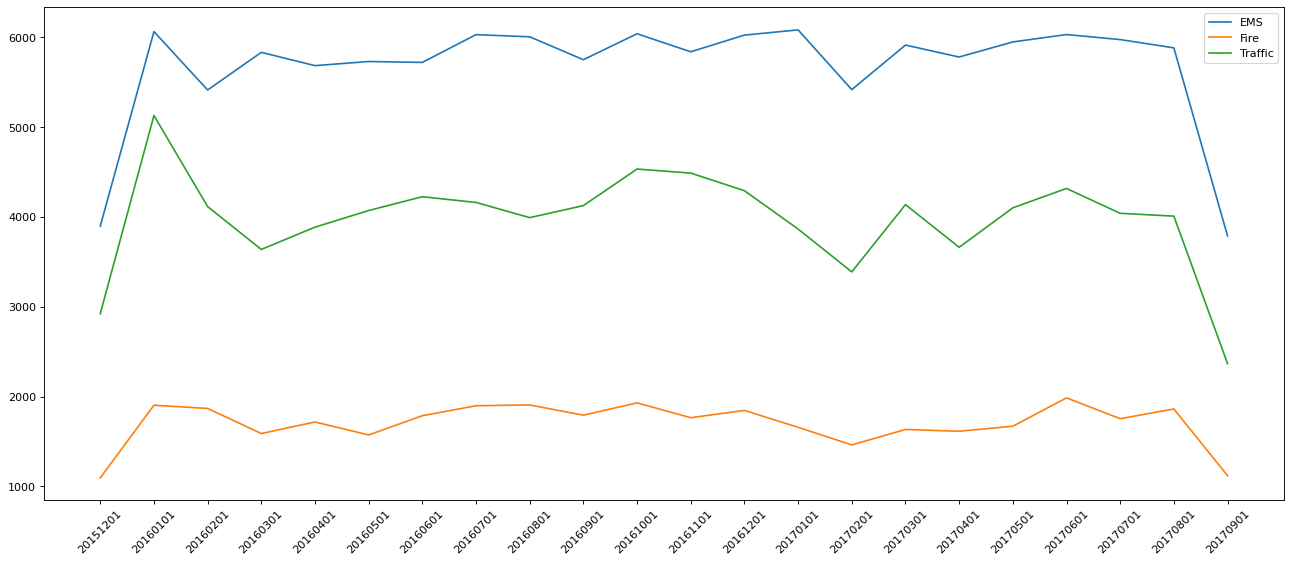

In [38]:
plt.figure(figsize=(20, 8), dpi=80)

# 分组,一图多线
#resample降采样，按月统计,索引必须是时间类型，类似groupby
for group_name, group_data in df.groupby(by="cate"):
    # 对不同的分类都进行绘图
    count_by_month = group_data.resample("MS").count()["title"]  #降采样
    print(count_by_month)
    # 画图
    _x = count_by_month.index
    print(_x)
    _y = count_by_month.values #values是对应事故发生次数

    _x = [i.strftime("%Y%m%d") for i in _x]  #变年月日格式

    plt.plot(_x, _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()

### 分组运算

In [42]:
import numpy as np
#分组后给名称加前缀
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

print('-'*50)
# 按key1分组后，计算data1，data2的统计信息并附加到原始表格中，并添加表头前缀
k1_sum = df_obj.groupby('key1')[['data1','data2']].mean().add_prefix('mean_')
print(k1_sum)

  key1   key2  data1  data2
0    a    one      1      7
1    b    one      2      9
2    a    two      7      3
3    b  three      1      2
4    a    two      1      9
5    b    two      8      4
6    a    one      9      8
7    a  three      2      3
--------------------------------------------------
      mean_data1  mean_data2
key1                        
a       4.000000         6.0
b       3.666667         5.0


In [51]:
# 方法2，使用transform，分组后计算结果和原本的df保持一致
k1_sum_tf = (df_obj.groupby('key1')[['data1','data2']]
             .transform('mean').add_prefix('mean_'))
print(k1_sum_tf)
print('\n')
df_obj[k1_sum_tf.columns] = k1_sum_tf
print(df_obj)

   mean_data1  mean_data2
0    4.000000         6.0
1    3.666667         5.0
2    4.000000         6.0
3    3.666667         5.0
4    4.000000         6.0
5    3.666667         5.0
6    4.000000         6.0
7    4.000000         6.0


  key1   key2  data1  data2  mean_data1  mean_data2
0    a    one      1      7    4.000000         6.0
1    b    one      2      9    3.666667         5.0
2    a    two      7      3    4.000000         6.0
3    b  three      1      2    3.666667         5.0
4    a    two      1      9    4.000000         6.0
5    b    two      8      4    3.666667         5.0
6    a    one      9      8    4.000000         6.0
7    a  three      2      3    4.000000         6.0


In [53]:
(df_obj.groupby('key1')[['data1','data2']]
 .mean())

,data1,data2
key1,,
a,4.000000,6.0
b,3.666667,5.0


In [54]:
df_obj

,key1,key2,data1,data2,mean_data1,mean_data2
0,a,one,1,7,4.000000,6.0
1,b,one,2,9,3.666667,5.0
2,a,two,7,3,4.000000,6.0
3,b,three,1,2,3.666667,5.0
4,a,two,1,9,4.000000,6.0
5,b,two,8,4,3.666667,5.0
6,a,one,9,8,4.000000,6.0
7,a,three,2,3,4.000000,6.0


In [55]:
del df_obj['key2']

In [56]:
df_obj.groupby('key1').transform(np.mean)

,data1,data2,mean_data1,mean_data2
0,4.000000,6.0,4.000000,6.0
1,3.666667,5.0,3.666667,5.0
2,4.000000,6.0,4.000000,6.0
3,3.666667,5.0,3.666667,5.0
4,4.000000,6.0,4.000000,6.0
5,3.666667,5.0,3.666667,5.0
6,4.000000,6.0,4.000000,6.0
7,4.000000,6.0,4.000000,6.0


In [58]:
#实现a组和b组，谁比平均分高，谁比平均分低
def diff_mean(s):
    """
        返回数据与均值的差值，s传入的是某一个分组
    """
    return s - s.mean()
#transform的结果和原df保持一致，groupby的结果是分组后的df，transform的结果是和原df保持一致的df
print(df_obj.groupby('key1').transform(diff_mean))

      data1  data2  mean_data1  mean_data2
0 -3.000000    1.0         0.0         0.0
1 -1.666667    4.0         0.0         0.0
2  3.000000   -3.0         0.0         0.0
3 -2.666667   -3.0         0.0         0.0
4 -3.000000    3.0         0.0         0.0
5  4.333333   -1.0         0.0         0.0
6  5.000000    2.0         0.0         0.0
7 -2.000000   -3.0         0.0         0.0
